In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import os
from os.path import join

# data_dir 경로 설정 (LMS 환경)
# hint : os.getenv를 사용하거나 직접 경로를 작성
data_dir = os.getenv('HOME') + '/aiffel/kaggle_kakr_housing/data'

# Project 시작 11.05

In [4]:
train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
train_origin = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
test_origin = pd.read_csv(test_data_path)

print('얍💢')

얍💢


In [ ]:
print("Train data shape:", train_origin.shape)
print("Test data shape:", test_origin.shape)

In [ ]:
# del train['id']
# print(train.columns)

In [ ]:
# test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)
# test.head()
# train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)


In [ ]:
# del test['id']
# print(test.columns)


In [ ]:
"""
seaborn의 `kdeplot`을 활용해 `y`의 분포를 확인해주세요!
"""

sns.kdeplot(y)
plt.show()

#코드 작성

## 데이터간 관계성 알아보기 (시각화)
train_origin data  
y = train_origin['price']


In [ ]:
import matplotlib.pyplot as plt

# Load the data

# Create scatter plots for 'lat' and 'long' against 'price'
fig, axes = plt.subplots(1, 2, figsize=(12, 15))

# Scatter plot for 'lat' vs 'price'
sns.scatterplot(data=train_origin, x='lat', y='price', ax=axes[0])
axes[0].set_title('Latitude vs Price')

# Scatter plot for 'long' vs 'price'
sns.scatterplot(data=train_origin, x='long', y='price', ax=axes[1])
axes[1].set_title('Longitude vs Price')

# zipcode

# 

plt.tight_layout()
plt.show()

In [51]:
print("Min:", train['price'].min())
print("Max:", train['price'].max())

Min: 78000.0
Max: 7700000.0


## - 모델을 훈련하는데 있어, 4만 이상의 Price들을 제거해보자  (시도가능)  
train_filtered = train_origin[train_origin['price'] < 4000000]



In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_origin.index, y=train_origin['price'])
plt.title('Scatter Plot of Price Values')
plt.xlabel('Index') # 각 행의 위치 15034개
plt.ylabel('Price')
plt.show()

In [ ]:
# zipcode vs price
sns.scatterplot(data=train_origin, x='zipcode', y='price')


# 1. 데이터 EDA
## 1-1.컬럼별 price와의 관계 시각화

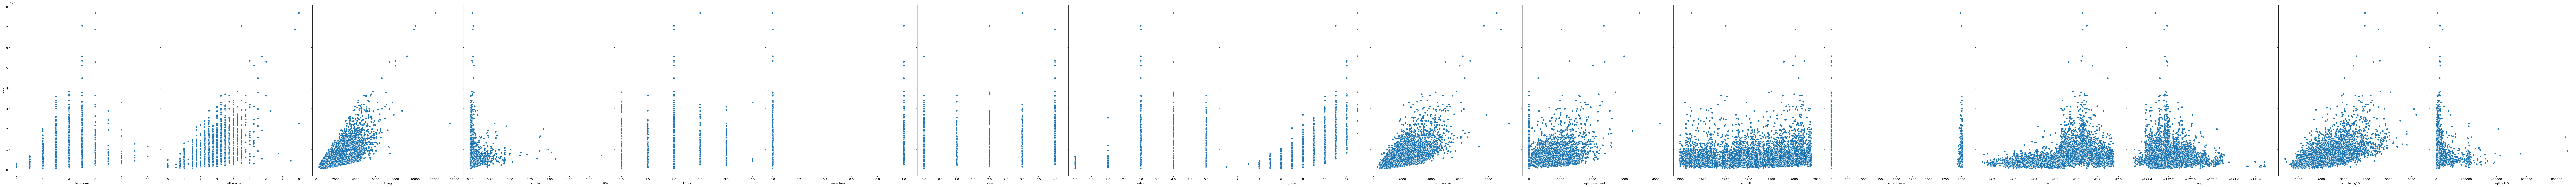

In [5]:

# 분석할 수치형 컬럼을 리스트로 정의
numerical_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                     'floors', 'waterfront', 'view', 'condition', 'grade', 
                     'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
                     'lat', 'long', 'sqft_living15', 'sqft_lot15']

# price를 기준으로 pairplot 생성
sns.pairplot(train_origin[numerical_columns], y_vars=['price'], 
             x_vars=numerical_columns[1:], height=9, aspect=0.8)
plt.tight_layout()
plt.show()

# 1-2.데이터 살펴보기
pandas의 read_csv 함수를 사용해 데이터를 읽어오고, 각 변수들이 나타내는 의미를 살펴보겠습니다.
#### 1. ID : 집을 구분하는 번호   
#### => 칼럼삭제
#### 2. date : 집을 구매한 날짜   
#### => 칼럼삭제 
3. price : 타겟 변수인 집의 가격
4. bedrooms : 침실의 수 ㅇ
5. bathrooms : 침실당 화장실 개수 ㅇ
6. sqft_living : 주거 공간의 평방 피트 ㅇ  

#### 7. sqft_lot : 부지의 평방 피트   
#### => 칼럼 삭제 가능. price와의 관련성 크게 없어보임. 주거공간의 면적이 관련성ㅇ
#### 8. floors : 집의 층 수  
#### => pirce 4만이상 제거 기준, 3.5층 데이터들 제거
#### 9. waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)  
#### => 칼럼 삭제 가능. 0,1 유무에따라 price가 유의미하게 변하지 않음 
#### 10. view : 집이 얼마나 좋아 보이는지의 정도  
#### => 질문. 유의미한가,, 4점인 집, 3백만원 이상: 20채 / 0점인집, 3백만원 이상: 9채
11. condition : 집의 전반적인 상태 ㅇ
12. grade : King County grading 시스템 기준으로 매긴 집의 등급 ㅇ
13. sqft_above : 지하실을 제외한 평방 피트 ㅇ
#### 14. sqft_basement : 지하실의 평방 피트  
#### => 삭제
15. yr_built : 집을 지은 년도
#### 16. yr_renovated : 집을 재건축한 년도 
#### => 삭제. 3백만원 이상인 집 중 재건축하지 않은(0) 집의 갯수가 더 많음, 나머지 3미만의 count값
17. zipcode : 우편번호
#### => 삭제. 

18. lat : 위도
#### => pirce 4백만 이상 제거
19. long : 경도
#### => pirce 4백만 이상 제거

20. sqft_living15 : 2015년 기준 주거 공간의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)
21. sqft_lot15 : 2015년 기준 부지의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)
#### => train_origin = train_origin[(train_origin['sqft_living15'] < 5000)] 데이터만 추출해보기. 5000이상의 값 17개 제외 

- 모델을 훈련하는데 있어, 4만 이상의 Price들을 제거해보자  (시도가능)  
train_filtered = train_origin[train_origin['price'] < 4000000] 4백만  
count_above_4 = (train_origin['price'] >= 4000000).sum()  : 8개 확인  


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_origin.index, y=train_origin['sqft_lot'])
plt.title('Scatter Plot of Price Values')
plt.xlabel('Index') # 각 행의 위치 15034개
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_origin.index, y=train_origin['waterfront'])
plt.title('Scatter Plot of Price Values')
plt.xlabel('Index') # 각 행의 위치 15034개
plt.show

In [ ]:
waterfront_counts = train_origin['waterfront'].value_counts()
waterfront_counts

In [ ]:
view_counts = train_origin['view'].value_counts()
view_counts

In [ ]:
count_above_4 = (train_origin['price'] >= 4000000).sum()
count_above_4

In [ ]:
# price가 3백만 이상인 데이터 중 view 컬럼별로 개수 세기
price_above_3m = train_origin[train_origin['price'] >= 3000000]
view_price_counts = price_above_3m['view'].value_counts()
view_price_counts

In [ ]:
sqft_basement_counts = train_origin['sqft_basement'].value_counts()
sqft_basement_counts

In [ ]:
yr_renovated_counts = train_origin['yr_renovated'].value_counts()
yr_renovated_counts


In [ ]:
# price가 3백만 이상인 데이터 중 view 컬럼별로 개수 세기
yr_renovated_price_counts = price_above_3m['yr_renovated'].value_counts()
yr_renovated_price_counts

In [ ]:
sqft_living15_count = train_origin[(train_origin['sqft_living15'] >= 5000) & (train_origin['sqft_living15'] <= 6000)].shape[0]
sqft_living15_count

# 2. 데이터 컬럼 제거

In [6]:
# 1) 위에서 삭제하고자 한 컬럼들을 train_origin과 test_origin 데이터에서 제거
columns_to_drop = ['id', 'date', 'sqft_lot', 'waterfront', 'sqft_basement', 'zipcode', 'view']
train_origin = train_origin.drop(columns=columns_to_drop)
test_origin = test_origin.drop(columns=columns_to_drop)


In [7]:

# 2) price가 4백만 이상인 행을 제거 (train_origin 데이터에서만)
train_origin = train_origin[train_origin['price'] < 4000000]

# 3) sqft_living이 5000 미만인 데이터만 추출
train_origin = train_origin[train_origin['sqft_living'] < 5000]

# 결과 확인
print("Train data shape:", train_origin.shape)
print("Test data shape:", test_origin.shape)

Train data shape: (14883, 14)
Test data shape: (6468, 13)


## - 깨달음 : train으로 모델 fit -> test로 prediction 해놓기. 그 중간의 과정에서 rmse를 보는것
## - test의 값들을 넣어 최종 Prediction 만든 후 -> sub에 치환하기

# 3. Scaling: log-scaling을 통한 데이터 분포 정규분포화 시키기
### 각 변수들의 분포 확인 : 한쪽으로 치우친 분포는 모델이 결과를 예측하기에 좋지 않은 영향을 미치므로 다듬어줄 필요가 있습니다.

In [9]:
# drop되지 않은 것 중 스케일링 필요한 컬럼들 : 'bedrooms', 'sqft_living', 'sqft_above'
skew_columns = ['bedrooms', 'sqft_living', 'sqft_above']

for c in skew_columns:
    train_origin[c] = np.log1p(train_origin[c].values)
    test_origin[c] = np.log1p(test_origin[c].values)

    # 결론 test도 똑같이 정규화 진행
    # 정규화 완

In [10]:
y = train_origin['price'] # y란? = y_train, y_test로 찢어짐


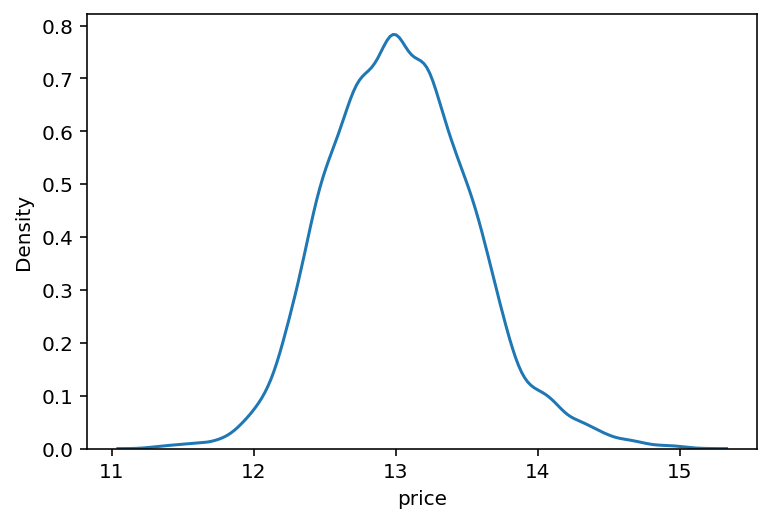

In [11]:
y = np.log1p(y) # y = y_train, y_test로 찢어짐
sns.kdeplot(y)
plt.show()
# 궁금. test data도 log화 해야하지 않는지. ㅇ  자동으로 스케일링 됨 위에서.

따라서 y는 np.log1p() 함수를 통해 로그 변환을 해주고, log(1 + x)   
나중에 모델이 값을 예측한 후에 다시 np.expm1()을 활용해서 되돌리겠습니다.   
np.expm1()은 np.log1p()과는 반대로 각 원소 x마다 exp(x)-1의 값을 반환해 줍니다. 



In [12]:
print("Train data shape:", train_origin.shape)
print("Test data shape:", test_origin.shape)

Train data shape: (14883, 14)
Test data shape: (6468, 13)


In [14]:
train_origin.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,1.386294,1.00,7.074117,1.0,3,7,7.074117,1955,0,47.5112,-122.257,1340,5650
1,180000.0,1.098612,1.00,6.647688,1.0,3,6,6.647688,1933,0,47.7379,-122.233,2720,8062
2,510000.0,1.386294,2.00,7.427144,1.0,3,8,7.427144,1987,0,47.6168,-122.045,1800,7503
3,257500.0,1.386294,2.25,7.447751,2.0,3,7,7.447751,1995,0,47.3097,-122.327,2238,6819
4,291850.0,1.386294,1.50,6.966967,1.0,3,7,6.966967,1963,0,47.4095,-122.315,1650,9711


In [15]:
y.head()

0    12.309987
1    12.100718
2    13.142168
3    12.458779
4    12.583999
Name: price, dtype: float64

In [16]:
del train_origin['price']

In [ ]:
print("Train data shape:", train_origin.shape)
print("Train data_y shape:", y.shape)
print("Test data shape:", test_origin.shape)

- 전처리 완료

# 3. 모델 학습

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [18]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))


In [19]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


In [20]:
random_state=2020        # 하지만 우리는 이렇게 고정값을 세팅해 두겠습니다. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

In [21]:
def get_scores(models, train, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
    # train, test 데이터셋 분리
    # random_state를 사용하여 고정하고 train과 test 셋의 비율은 8:2로 합니다.
        X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=2020)

    # 모델 학습
        model.fit(X_train, y_train)

    # 예측
        pred = model.predict(X_test)

    # 예측 결과의 rmse값 저장
        df[model_name] = rmse(y_test, pred)
    
    # data frame에 저장
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    return df
    


In [22]:
get_scores(models, train_origin, y)
# 위에서 y 값을 로그화로 정규화하는것을 깜박함 -> 다시 진행

{'GradientBoostingRegressor': 136793.36770735524,
 'XGBRegressor': 127309.50992005218,
 'LGBMRegressor': 123221.94694671631,
 'RandomForestRegressor': 132164.73382112922}

# 그리드 탐색

In [23]:
from sklearn.model_selection import GridSearchCV

# 뉴메리컬 2의 제곱수, 1 10 100 1000 0.1 0.01 10의 배수로 해봄




In [ ]:
# 조정할 수 있는 하이퍼파라미터 준비 예시
# param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [1, 10],


## 구글링 Para 추천
- 시간상 XGboost, rdforest만

In [ ]:
param_grid_xgboost = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
 # 각 트리 생성 시 사용하는 데이터의 비율
}

In [ ]:
param_grid_rdforest = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],  # 깊이 제한 없음 (None), 또는 특정 깊이 설정
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
  # 각 노드에서 고려할 최대 피처 수
}

In [24]:
param_grid_lightgbm = {
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [10, 20],  # 깊이 -1은 제한 없음
    'num_leaves': [31, 50],  # 한 트리가 가질 수 있는 리프 노드 최대 수
    'min_data_in_leaf': [20, 30],  # 리프 노드에 필요한 최소 데이터 수
    'feature_fraction': [0.6, 0.8]  # 각 트리 학습에 사용하는 피처 비율
}

In [26]:
model1 = lightgbm
grid_model = GridSearchCV(model1, param_grid=param_grid_lightgbm, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train_origin, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will b

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2020), n_jobs=5,
             param_grid={'feature_fraction': [0.6, 0.8],
                         'learning_rate': [0.01, 0.1], 'max_depth': [10, 20],
                         'min_data_in_leaf': [20, 30],
                         'n_estimators': [200, 300], 'num_leaves': [31, 50]},
             scoring='neg_mean_squared_error', verbose=1)

In [27]:
grid_model.cv_results_

{'mean_fit_time': array([2.70600557, 3.65124021, 4.04496675, 6.14697723, 3.05337481,
        3.996032  , 4.07512631, 6.2483849 , 2.8154808 , 4.08846097,
        4.49107022, 5.66660395, 2.59025993, 3.34025512, 3.7140861 ,
        5.42898798, 2.01060472, 2.91785073, 2.93039045, 4.34479108,
        2.21380243, 2.87893691, 2.94282284, 4.36088891, 2.02024188,
        3.14011312, 3.3467361 , 4.55628171, 2.21623416, 2.94179959,
        2.88052216, 4.67711377, 3.01905289, 3.49334722, 4.34583592,
        7.14447999, 4.01031814, 5.22150955, 5.05879827, 5.93555789,
        2.62114043, 3.93128605, 4.07114038, 5.90303636, 2.81792965,
        4.02984791, 3.83424349, 5.98722987, 2.22788043, 2.89835844,
        3.22881975, 4.41666732, 2.26131301, 2.82154293, 3.32922759,
        4.23284264, 2.23764424, 3.03846927, 3.06337056, 4.67016454,
        2.27398834, 2.99356418, 3.2183095 , 4.17106113]),
 'std_fit_time': array([0.24562406, 0.34623719, 0.43589624, 0.39722108, 0.15162035,
        0.37230756, 0.547

In [28]:
# 파라미터 조합은 위 딕셔너리 중 params에, 각각에 대한 테스트 점수는 mean_test_score에 저장되어 있습니다.
params_result = grid_model.cv_results_['params']
params_result

[{'feature_fraction': 0.6,
  'learning_rate': 0.01,
  'max_depth': 10,
  'min_data_in_leaf': 20,
  'n_estimators': 200,
  'num_leaves': 31},
 {'feature_fraction': 0.6,
  'learning_rate': 0.01,
  'max_depth': 10,
  'min_data_in_leaf': 20,
  'n_estimators': 200,
  'num_leaves': 50},
 {'feature_fraction': 0.6,
  'learning_rate': 0.01,
  'max_depth': 10,
  'min_data_in_leaf': 20,
  'n_estimators': 300,
  'num_leaves': 31},
 {'feature_fraction': 0.6,
  'learning_rate': 0.01,
  'max_depth': 10,
  'min_data_in_leaf': 20,
  'n_estimators': 300,
  'num_leaves': 50},
 {'feature_fraction': 0.6,
  'learning_rate': 0.01,
  'max_depth': 10,
  'min_data_in_leaf': 30,
  'n_estimators': 200,
  'num_leaves': 31},
 {'feature_fraction': 0.6,
  'learning_rate': 0.01,
  'max_depth': 10,
  'min_data_in_leaf': 30,
  'n_estimators': 200,
  'num_leaves': 50},
 {'feature_fraction': 0.6,
  'learning_rate': 0.01,
  'max_depth': 10,
  'min_data_in_leaf': 30,
  'n_estimators': 300,
  'num_leaves': 31},
 {'feature_fr

In [29]:
score = grid_model.cv_results_['mean_test_score']

- 회귀 문제에서, neg_mse는 음수를 사용, 절댓값이 낮을수록 좋은 성능이라는군!

In [30]:
results = pd.DataFrame(params_result)
results['score'] = score

results['RMSE'] = np.sqrt(-1 * results['score'])
results = results.rename(columns={'RMSE': 'RMSLE'})
results = results.sort_values('RMSLE')
results

,feature_fraction,learning_rate,max_depth,min_data_in_leaf,n_estimators,num_leaves,score,RMSLE
52,0.8,0.10,10,30,200,31,-0.029918,0.172968
53,0.8,0.10,10,30,200,50,-0.030007,0.173224
57,0.8,0.10,20,20,200,50,-0.030062,0.173384
54,0.8,0.10,10,30,300,31,-0.030076,0.173425
61,0.8,0.10,20,30,200,50,-0.030077,0.173426
...,...,...,...,...,...,...,...,...
44,0.8,0.01,20,30,200,31,-0.045791,0.213987
0,0.6,0.01,10,20,200,31,-0.048005,0.219101
8,0.6,0.01,20,20,200,31,-0.048006,0.219102
12,0.6,0.01,20,30,200,31,-0.048030,0.219158


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warn

In [ ]:
# 최적 하이퍼 파라미터 :   0.8	0.10	10	30	200	31

In [ ]:
# 불필요한 과정이었던듯 ....
# 'RMSLE'를 다시 'RMSE'로 계산
# results['RMSE'] = np.exp(results['RMSLE']) - 1  # RMSLE를 역변환하여 RMSE 계산

# # 'RMSLE' 컬럼 제거 후 'RMSE' 컬럼으로 정렬
# results = results.drop(columns=['RMSLE'])
# results_RMSE = results.sort_values('RMSE').reset_index(drop=True)


In [32]:
# 최종_최적의 하이퍼파라미터 대입 RMSE 도출
def evaluate_model_with_best_params(train, y):
    # 최적의 하이퍼파라미터 설정
    best_params = {
        'feature_fraction': 0.8,
        'learning_rate': 0.1,
        'max_depth': 10,
        'min_data_in_leaf': 30,
        'n_estimators': 200,
        'num_leaves': 31
    }

    # 모델 초기화 및 하이퍼파라미터 적용
    model = lgb.LGBMRegressor(**best_params)
    
    # train, test 데이터셋 분리
    X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=2020)

    # 모델 학습
    model.fit(X_train, y_train)
    
    # 테스트 데이터 예측
    pred = model.predict(X_test)
    
    # RMSE 계산
    rmse_score = rmse(y_test, pred)
    print(f"RMSE on test data: {rmse_score:.4f}")


In [33]:
# 사용 예시
evaluate_model_with_best_params(train_origin, y)

RMSE on test data: 122462.2191


## - Average Blending 등도 해보았지만... 더 공부가 필요할 것 같다..

## Average Blending 시도

In [34]:
def get_cv_score(models):
    kfold = KFold(n_splits=5).get_n_splits(x.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X=x.values, y=y, cv=kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")
print('얍💢')

얍💢


In [35]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

In [38]:
def get_cv_score(models, x, y):
    kfold = KFold(n_splits=5).get_n_splits(x.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X=x.values, y=y, cv=kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")
print('얍💢')

얍💢


In [39]:
get_cv_score(models, train_origin, y)

Model: GradientBoosting, CV score:0.8583
Model: XGBoost, CV score:0.8718
Model: LightGBM, CV score:0.8802


In [47]:
def AveragingBlending(models, x, y, sub_x): #x = data.iloc[:train_len, :] , y:train[price]

    for m in models : 
        m['model'].fit(x.values, np.expm1(y))
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

print('얍💢')

얍💢


In [48]:
y_pred = AveragingBlending(models, train_origin, y, test_origin)
print(len(y_pred)) # 최종 예측된 데이터의 개수
y_pred # test데이터만큼 예측값을 포함


6468


array([ 567555.26296921,  468221.77165587, 1460066.25412574, ...,
        453624.45422162,  339879.30468652,  422236.31026228])

In [45]:
# y_pred_expm1 = np.expm1(y_pred)
# y_pred_expm1

array([ 540913.02247634,  474995.59606196, 1398374.23378922, ...,
        441590.04739616,  341627.71634447,  424815.38484886])

In [49]:
max(y_pred)

2775553.859962093

In [53]:
# AveragingBlending으로 학습한 모델의 예측 생성
y_pred = AveragingBlending(models, train_origin, y, train_origin)  
# train_origin을 다시 예측값 생성에 사용,,,하면 안되겠다

# RMSE 계산
rmse_score = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse_score}")



RMSE: 600264.0868681436


# - 잘못된 방법 -> 다시....

In [54]:
def get_rmse_from_averaging(models, X_test, y_test):
    # 모델로 예측값 생성
    predictions = np.column_stack([
        m['model'].predict(X_test.values) for m in models
    ])
    
    # 예측값 평균으로 최종 예측 생성
    y_pred = np.mean(predictions, axis=1)
    
    # RMSE 계산
    rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse_score


In [55]:
# 모델의 성능 확인 (예: train_origin 데이터 사용)
rmse_score = get_rmse_from_averaging(models, train_origin, y)
print(f"RMSE: {rmse_score}")

RMSE: 600264.0868681436


### * verbose, n_jobs 의미 궁금!
	1.	verbose: 이 파라미터는 그리드 탐색의 진행 상황을 출력하는 정도를 설정합니다.
	•	verbose=0: 출력하지 않음.
	•	verbose=1: 최소한의 출력. 보통 작업 시작과 종료만 출력합니다.
	•	verbose=2: 각 단계의 진행 상황을 출력합니다.
	•	verbose=3 이상: 더 많은 디테일을 출력합니다.
추천 설정: 일반적으로 verbose=2 정도를 사용하면 모델 학습의 진행 상황을 파악할 수 있어 실험 단계에서 적합합니다. 

	2.	n_jobs: 이 파라미터는 그리드 탐색을 수행할 때 사용할 CPU 코어 수를 설정합니다.
	•	n_jobs=1: 단일 코어 사용.
	•	n_jobs=-1: 가능한 모든 코어 사용.
	•	n_jobs=2 또는 그 이상: 지정된 개수의 코어 사용.
추천 설정: 보통 n_jobs=-1로 설정하여 시스템의 모든 코어를 활용하는 것이 좋습니다. 시스템 리소스가 제한된 경우 특정 코어 수만 지정하는 것도 가능합니다.


In [ ]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

In [ ]:
# 제출할 파일에 예측값 덮어 씌우기
submission['price'] = prediction
submission.head()

In [ ]:
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.164399')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

- 단, 앞으로는 많은 실험이 있을 예정이니 파일 이름에 모델의 종류와 위에서 확인했던 RMSLE 값을 넣어주면 제출 파일들이 깔끔하게 관리될 것

- format 활용, 이름 넣기

In [ ]:
# save_submission(model, train, y, test, 'lgbm', rmsle='0.164399')